<a href="https://colab.research.google.com/github/VaibhavShintre/Introduction-to-Data-Science/blob/main/CSC_442_Project_Group_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Names: Lavan Aditya, Amrish Naranappa, Vaibhav Shintre, Austin Bressler

In [32]:
# install the neccesary libraries
from google.colab import files
import io
import pandas as pd
import numpy as np

# upload the data file
uploaded = files.upload()

In [33]:
# read in the database
StudentMath = pd.read_csv('student-mat.csv', delimiter=';')
StudentPort = pd.read_csv('student-por.csv', delimiter=';')

# checking if the files were read correctly
print(StudentMath)
print(StudentPort)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health 

In [34]:
# Dropping the 'G1' and 'G2' columns from the StudentMath DataFrame to keep only 'G3' and other relevant columns
mathG3Only = StudentMath.drop(['G1', 'G2'], axis=1)

# Dropping the 'G1' and 'G2' columns from the StudentPort DataFrame to keep only 'G3' and other relevant columns
portG3Only = StudentPort.drop(['G1', 'G2'], axis=1)

# Rename columns in the math dataset to clearly indicate these values come from the math file.
Sm_temp = mathG3Only.rename(columns={'G3': 'MG3', "paid": "paidM", "failures": "failuresM", "absences": "absencesM"}, inplace=False)
print(Sm_temp)
# Rename columns in the Portuguese dataset to indicate they belong to the Portugal file.
sp_temp = portG3Only.rename(columns={'G3': 'PG3', "paid": "paidP", "failures": "failuresP", "absences": "absencesP"}, inplace=False)
print(sp_temp)


    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... internet romantic  famrel  freetime  goout

In [35]:
# performing an inner join between Sm_temp and sp_temp on their common columns
sm_inter = pd.merge(Sm_temp, sp_temp, 'inner')

# printing the result to verify that there is a correct amount of matching files.
print(sm_inter.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      370 non-null    object
 1   sex         370 non-null    object
 2   age         370 non-null    int64 
 3   address     370 non-null    object
 4   famsize     370 non-null    object
 5   Pstatus     370 non-null    object
 6   Medu        370 non-null    int64 
 7   Fedu        370 non-null    int64 
 8   Mjob        370 non-null    object
 9   Fjob        370 non-null    object
 10  reason      370 non-null    object
 11  guardian    370 non-null    object
 12  traveltime  370 non-null    int64 
 13  studytime   370 non-null    int64 
 14  failuresM   370 non-null    int64 
 15  schoolsup   370 non-null    object
 16  famsup      370 non-null    object
 17  paidM       370 non-null    object
 18  activities  370 non-null    object
 19  nursery     370 non-null    object
 20  higher    

# **Group Modeling Starts Here**

Variables: AbsencesM, AbsencesP, studytime, activities, (Vaibhav variables)

In [36]:
# import the decision tree library from the scikit learn
from sklearn.tree import DecisionTreeRegressor, plot_tree
# for training and testing
from sklearn.model_selection import train_test_split
# get the other type of tree
import sklearn.tree as tree
# get the ability to plot our results
import matplotlib.pyplot as plt
import seaborn as sns
# import the metrics for regression models
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# cross validation if we need it
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

Convert categorical variables into numeric varibles for model use

In [37]:
# Make variables into a categorical form
sm_inter["activitiesCat"] = sm_inter["activities"].astype("category")
# convert all of these variables into integer form
sm_inter["activitiesInt"] = sm_inter['activitiesCat'].cat.codes
print(sm_inter["activitiesInt"])

# Create a new target variable: the difference in final grades (math vs. Portuguese).
sm_inter['DeltaG3'] = sm_inter['MG3'] - sm_inter['PG3']

0      0
1      0
2      0
3      1
4      0
      ..
365    1
366    0
367    1
368    0
369    0
Name: activitiesInt, Length: 370, dtype: int8


We will split into X and y values.

In [38]:
#separate features and response varaible
features = ["activitiesInt", "absencesM", "absencesP", "studytime"]
X = sm_inter[features].values
y = sm_inter[["PG3","MG3","DeltaG3"]].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X)
print(y)

[[ 0  6  4  2]
 [ 0  4  2  2]
 [ 0 10  6  2]
 ...
 [ 1  0  6  2]
 [ 0  3  6  1]
 [ 0  0  4  1]]
[[11  6 -5]
 [11  6 -5]
 [12 10 -2]
 ...
 [ 9  0 -9]
 [10 16  6]
 [11 10 -1]]


In [39]:
# let's try several maximum depths
depth_values = [i for i in range (2,11)]
scores = []

# Train a Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
y_pred = dt_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Baseline Decision Tree MSE: {mse:.2f}")
print(f"Baseline Decision Tree R2: {r2:.2f}")

# Grid search for best parameters

from sklearn.model_selection import GridSearchCV
# parameters we will iterate through to find the best possible combination
param_grid = {
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# fit the search to find the best tree
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
# print the ideal parameters
print("Best parameters for Decision Tree:", grid_search.best_params_)
best_dt = grid_search.best_estimator_
y_pred_best_dt = best_dt.predict(X_test)
mse_best_dt = mean_squared_error(y_test, y_pred_best_dt)
r2_best_dt = r2_score(y_test, y_pred_best_dt)
# print the scoring variables for the tree
print(f"Optimized Decision Tree MSE: {mse_best_dt:.2f}")
print(f"Optimized Decision Tree R2: {r2_best_dt:.2f}")

Baseline Decision Tree MSE: 19.20
Baseline Decision Tree R2: -0.55
Best parameters for Decision Tree: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Optimized Decision Tree MSE: 11.90
Optimized Decision Tree R2: 0.03


Let's print the tree out to see how it looks

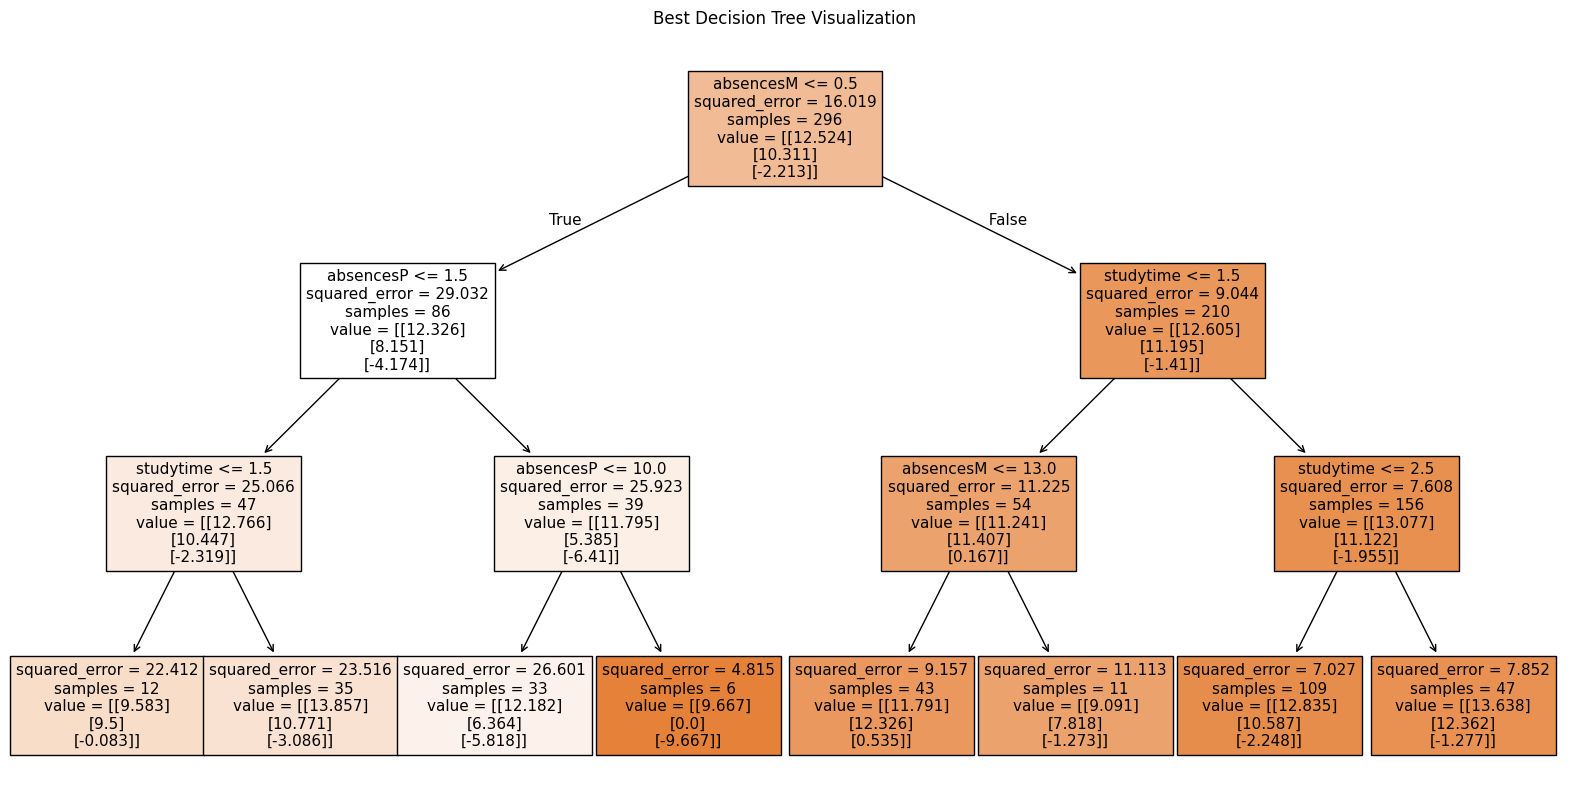

In [40]:
# print out the tree to see how it looks
plt.figure(figsize=(20,10))
plot_tree(best_dt, feature_names=features, filled=True)
plt.title("Best Decision Tree Visualization")
plt.show()

The tree splits at every possible spot so we will try to prune the tree to reduce overfitting

In [41]:
# acquire the impurities and alphas to supply to the new fit
path = best_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
# rebuild the model with different ccp alphas
# We'll keep the same max depth as before
model = []
for ccp_alpha in ccp_alphas:
    rlf = DecisionTreeRegressor(max_depth=3, min_samples_leaf=1, min_samples_split=2, ccp_alpha=ccp_alpha, random_state=42)
    rlf.fit(X_train, y_train)
    model.append(rlf)
print("Number of nodes in the last tree: {} with ccp_alpha is {}".format(
      model[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree: 1 with ccp_alpha is 1.1672942870813703


Now we will look at a chart of scores for our tree to determine the best model in relation to complexity

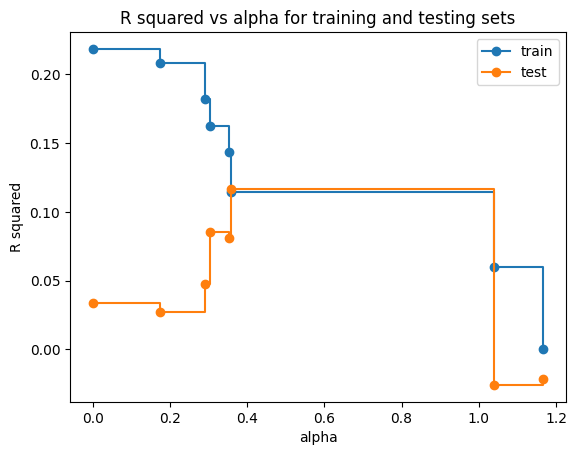

[0.03329622252846846, 0.026732807337993363, 0.04709690238113118, 0.08514535157610796, 0.08072791098216425, 0.11636579345291831, -0.026018247817428824, -0.02183522865332817]
[0.         0.17520368 0.29079052 0.30453189 0.35236985 0.35936408
 1.03943847 1.16729429]


In [42]:
# compare the training and test scores for each of the models
train_scores = [models.score(X_train, y_train) for models in model]
test_scores = [models.score(X_test, y_test) for models in model]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("R squared")
ax.set_title("R squared vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()
print(test_scores)
print(ccp_alphas)

0.4 seems to be the best CCP_Alpha score for the test data.

R-squared: 0.11636579345291831
MSE: 11.048773223461039
MAE: 2.6131911663826557


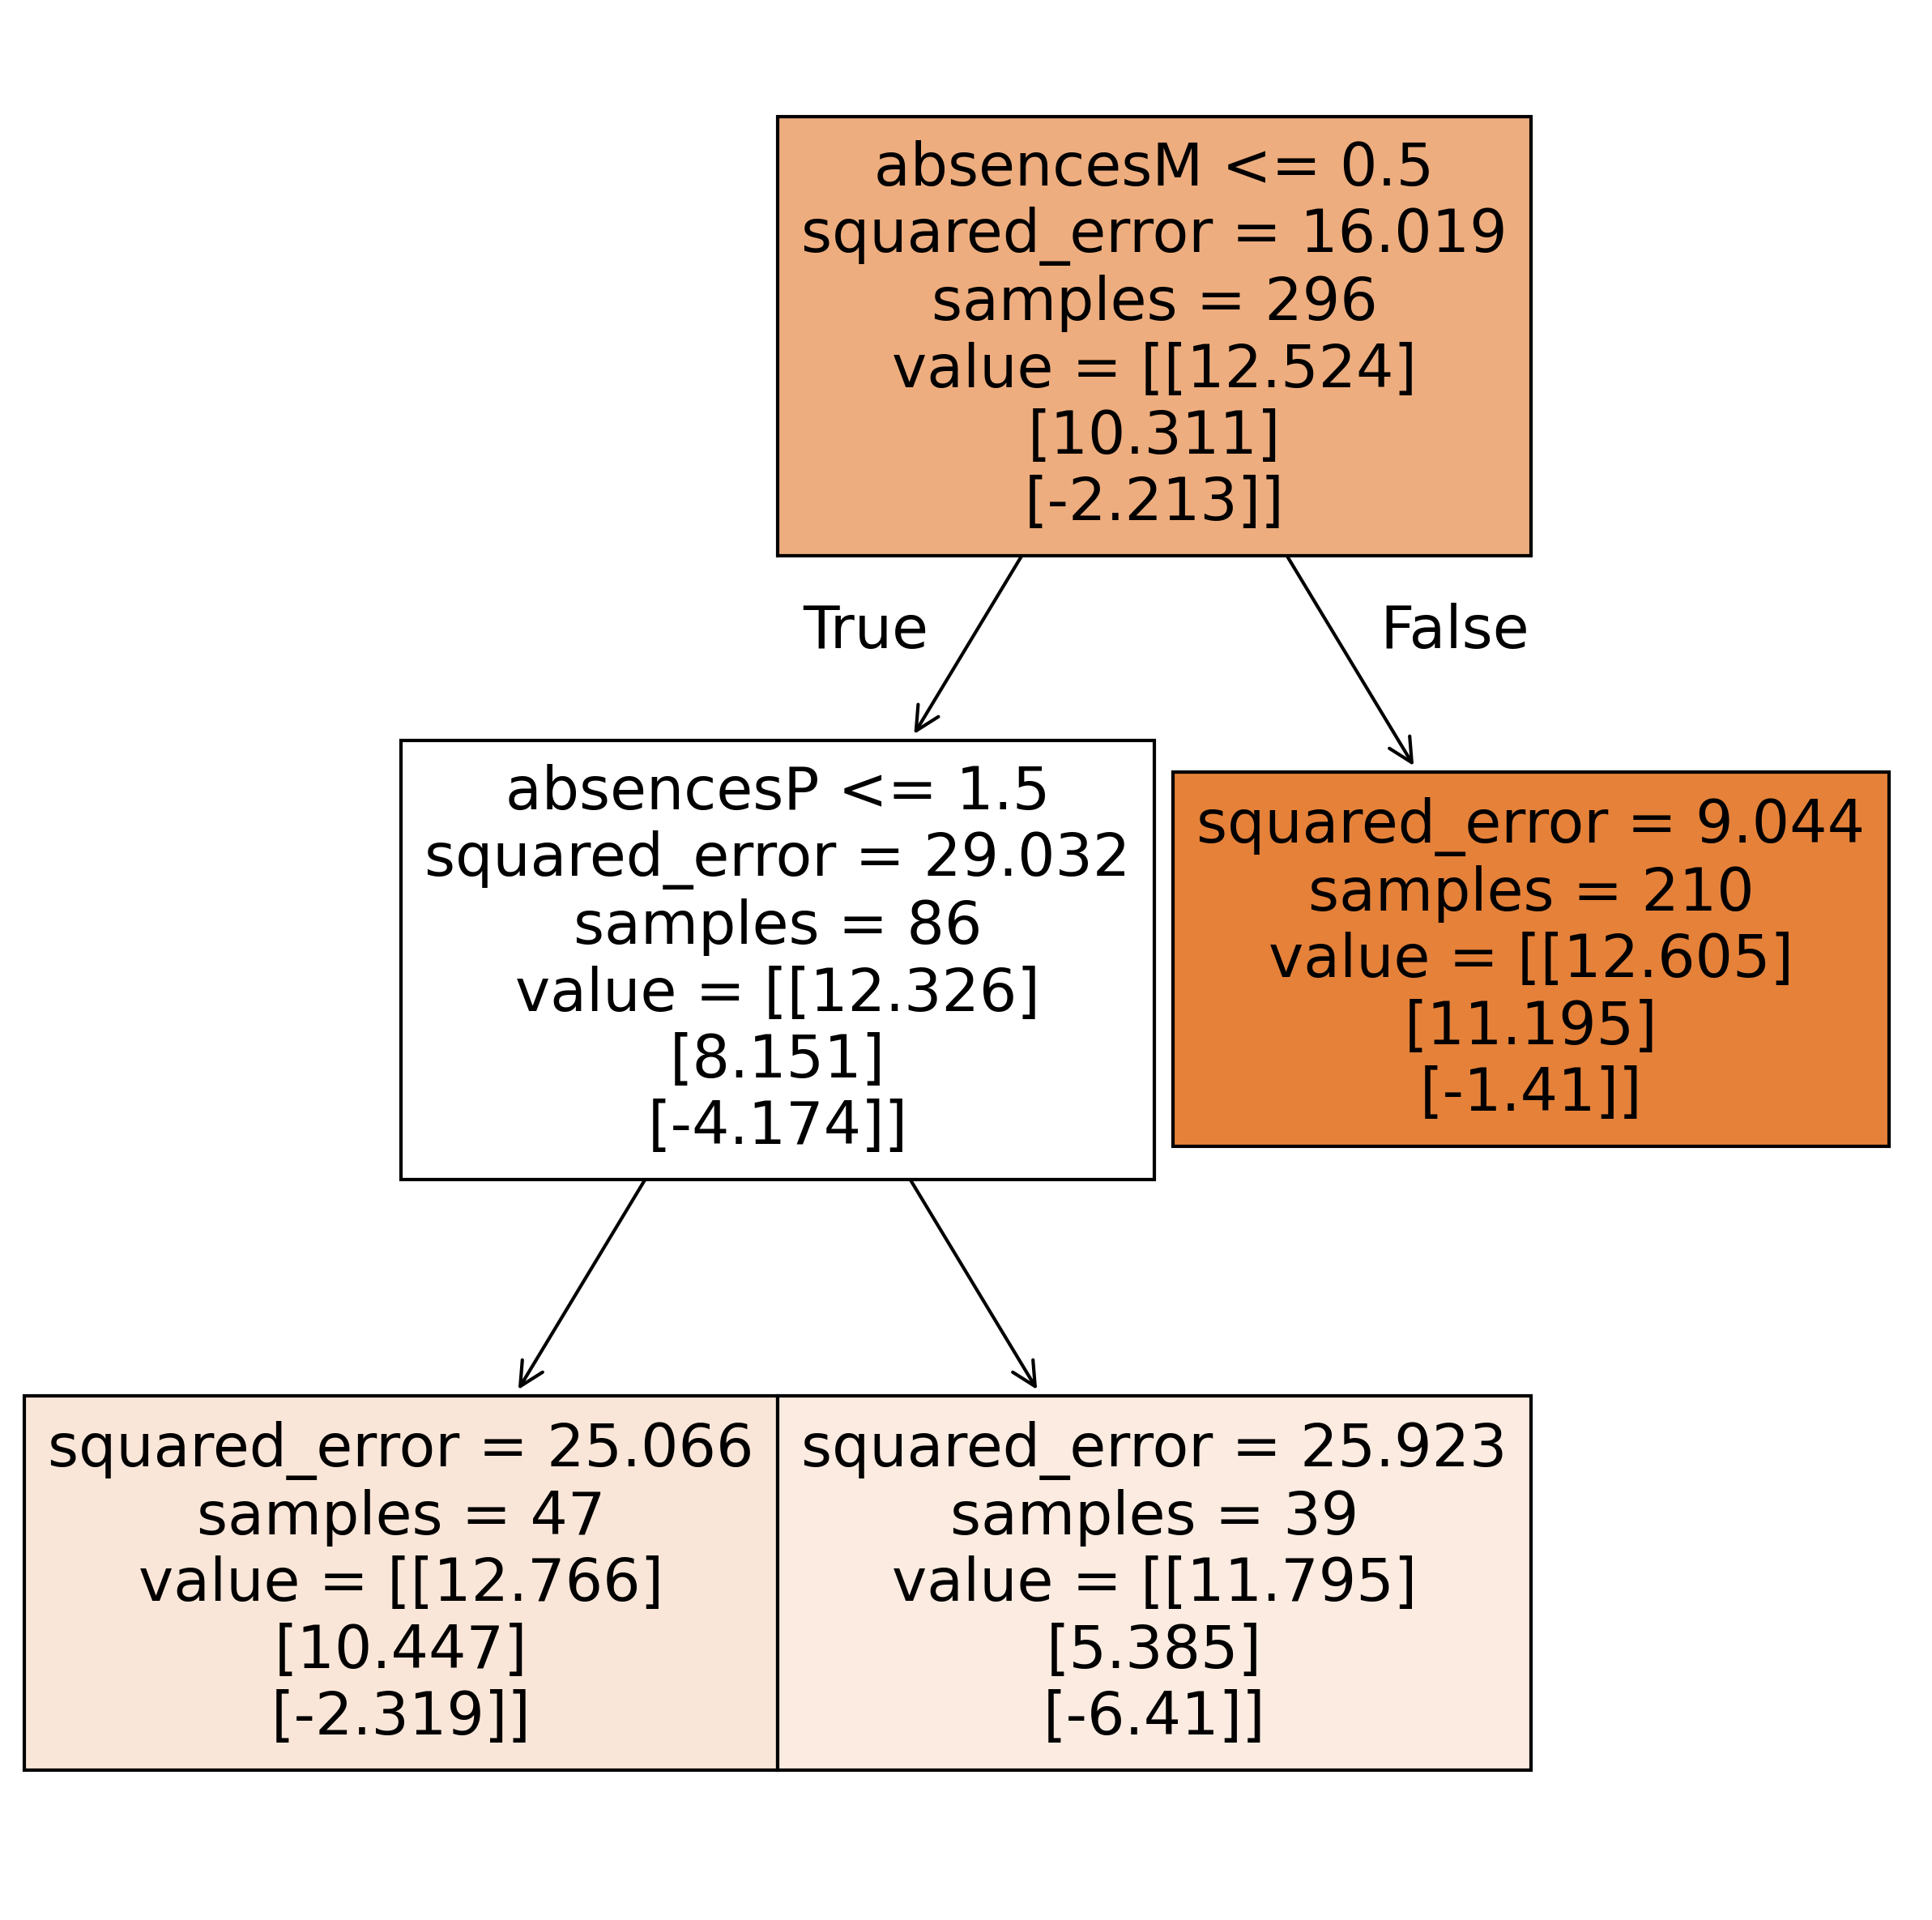

In [48]:
# fit with our new ccp_alpha value
best_dt = DecisionTreeRegressor(max_depth=3, min_samples_leaf=1, min_samples_split=2, ccp_alpha=0.37, random_state=42)
best_dt.fit(X_train, y_train)
plt.figure(figsize=(10,10), dpi = 300)
tree.plot_tree(best_dt, feature_names = features, filled = True);
# Let's look at the final score for our tree
y_pred_best_dt = best_dt.predict(X_test)
mse_best_dt = mean_squared_error(y_test, y_pred_best_dt)
r2_best_dt = r2_score(y_test, y_pred_best_dt)
mae_best_dt = mean_absolute_error(y_test, y_pred_best_dt)
print(f"R-squared: {r2_best_dt}")
print(f"MSE: {mse_best_dt}")
print(f"MAE: {mae_best_dt}")

After pruning we got a much better decision tree with an r squared value of about 0.12 on the test data, which means the tree after pruning explains a larger amount of variance in the test data. This means that the tree should now be a better predictor of the two grades and expected discrepency.